In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plt_imgshow(img, cvtColor=cv2.COLOR_BGR2RGB):
    img_rgb = cv2.cvtColor(img, cvtColor)
    plt.imshow(img_rgb)

按脸色提取

In [4]:
musk_img = cv2.imread('musk1.jpg')
musk_hsv = cv2.cvtColor(musk_img, cv2.COLOR_BGR2HSV)
musk_min_hsv = np.array([0, 10, 80], dtype='uint8')
musk_max_hsv = np.array([33, 255, 255], dtype='uint8')
musk_mask = cv2.inRange(musk_hsv, musk_min_hsv, musk_max_hsv)
musk_result = cv2.bitwise_and(musk_img, musk_img, mask=musk_mask)

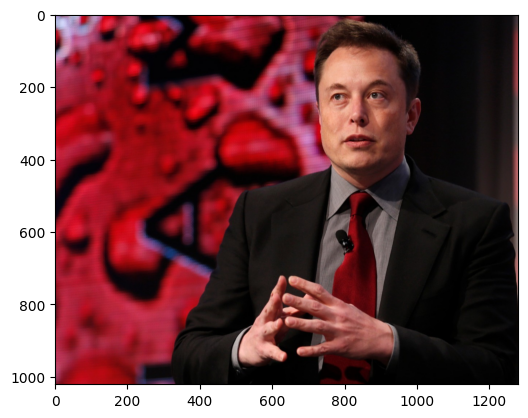

In [5]:
plt_imgshow(musk_img)

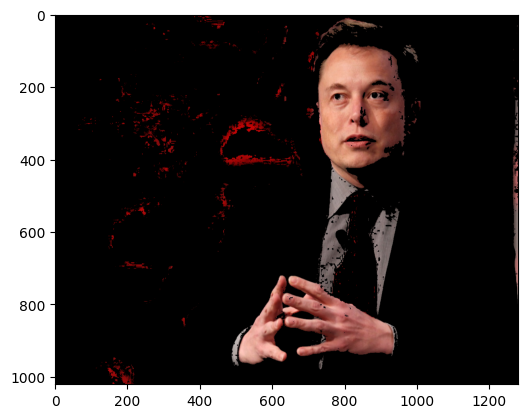

In [6]:
plt_imgshow(musk_result)

find contours

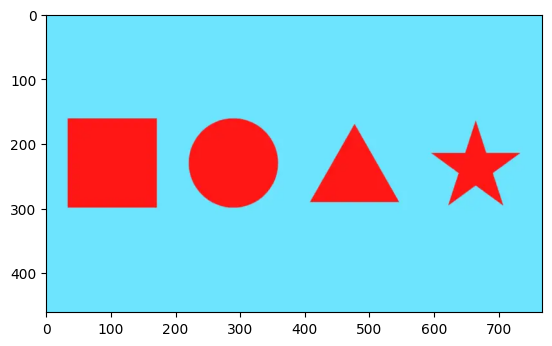

In [4]:
shapes_img = cv2.imread('shapes.webp')
plt_imgshow(shapes_img)

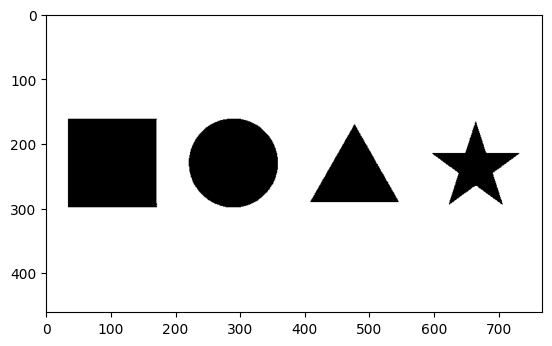

In [5]:
shapes_gray = cv2.cvtColor(shapes_img, cv2.COLOR_BGR2GRAY)
retval, shapes_binimg = cv2.threshold(shapes_gray, 127, 255, cv2.THRESH_BINARY)
plt_imgshow(shapes_binimg)

length: 5
hierarchy: [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [-1  3 -1 -1]]]


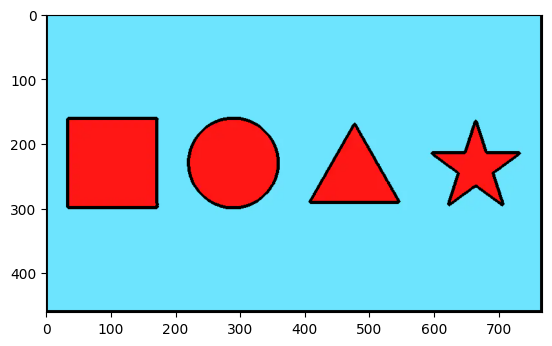

In [26]:
contours, hierarchy = cv2.findContours(shapes_binimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print('length:', len(contours))
print('hierarchy:', hierarchy)
shapes_copy = shapes_img.copy()
cv2.drawContours(shapes_copy, contours, -1, (0,0,0),3)
plt_imgshow(shapes_copy)

In [27]:
for i in range(len(contours)):
    print("%d: area=" % i, cv2.contourArea(contours[i]))

0: area= 8513.0
1: area= 6100.5
2: area= 15113.0
3: area= 19049.0
4: area= 352820.0


mark center of shapes with '+'

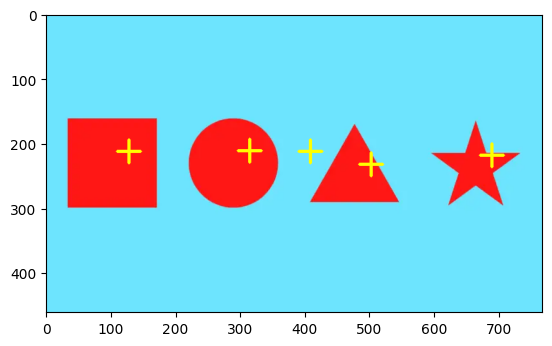

In [29]:
shapes_copy = shapes_img.copy()
for i in range(len(contours)):
    m00=cv2.moments(contours[i])['m00']
    m10=cv2.moments(contours[i])['m10']
    m01=cv2.moments(contours[i])['m01']
    cx, cy = int(m10/m00), int(m01/m00)
    cv2.putText(shapes_copy, '+', (cx, cy), cv2.FONT_HERSHEY_SIMPLEX,2, (0, 255, 255),3)
plt_imgshow(shapes_copy)

image moments

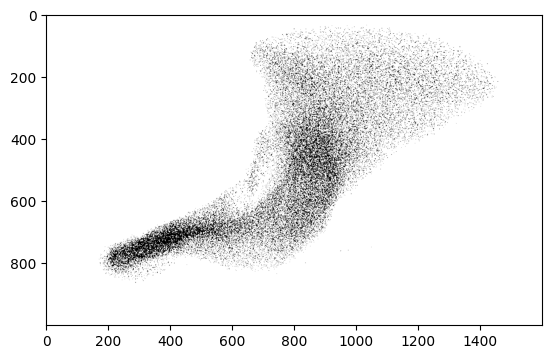

In [77]:
# https://zhuanlan.zhihu.com/p/424903693
swarm_img = cv2.imread('birdswarm3.jpeg')
swarm_gray = cv2.cvtColor(swarm_img, cv2.COLOR_BGR2GRAY)
retval, bin_img = cv2.threshold(swarm_gray, 50, 1, cv2.THRESH_BINARY)
swarm_binimg = bin_img * 255
plt_imgshow(swarm_binimg)

In [81]:
m00 = m01 = m10 = m11 = m20 = m02 = m21 = m12 = 0
height, width = swarm_binimg.shape
for y in range(height):
    for x in range(width):
        m00 += swarm_binimg[y, x]
        m10 += x * swarm_binimg[y, x]
        m01 += y * swarm_binimg[y, x]
        m11 += x * y * swarm_binimg[y, x]
        m20 += x * x * swarm_binimg[y, x]
        m02 += y * y * swarm_binimg[y, x]
        m21 += x * x * y * swarm_binimg[y, x]
        m12 += x * y * y * swarm_binimg[y, x]
cx, cy = m10/m00, m01/m00
cx, cy, height, width

(800.9776852544601, 499.95180959600873, 1000, 1600)

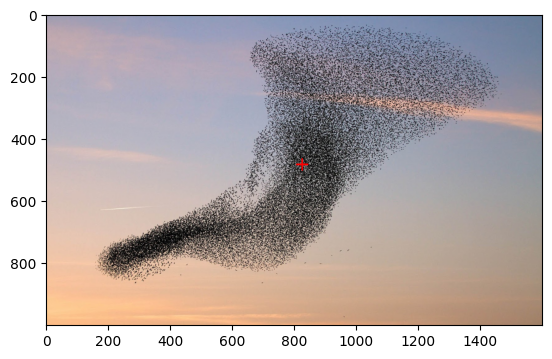

In [86]:
cv2.putText(swarm_img, '+', (int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX,2, (0, 0, 255),3)
plt_imgshow(swarm_img)

cell counting
https://stackoverflow.com/questions/58751101/count-number-of-cells-in-the-image

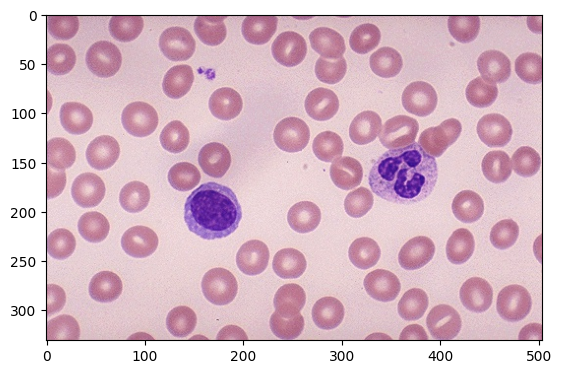

In [30]:
cells_img = cv2.imread('cells1.jpg')
plt_imgshow(cells_img)

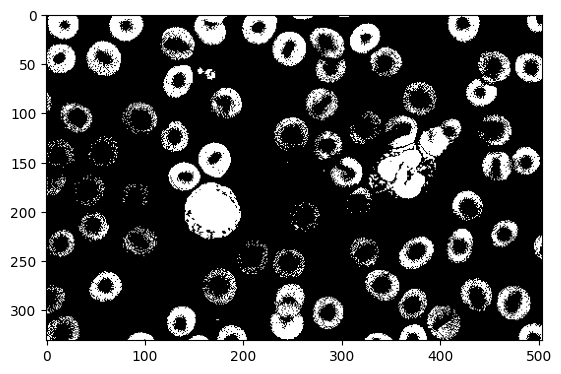

In [39]:
cells_gray = cv2.cvtColor(cells_img, cv2.COLOR_BGR2GRAY)
ret, bin_img = cv2.threshold(cells_gray, 150, 255, cv2.THRESH_BINARY_INV)
plt_imgshow(bin_img)

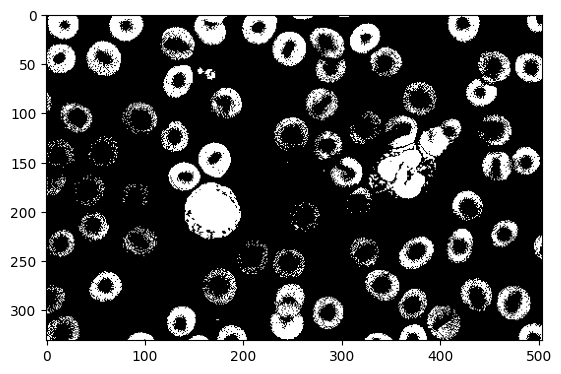

In [48]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,1))
cells_erosion = cv2.erode(bin_img, kernel=kernel, iterations=4)
plt_imgshow(cells_erosion)

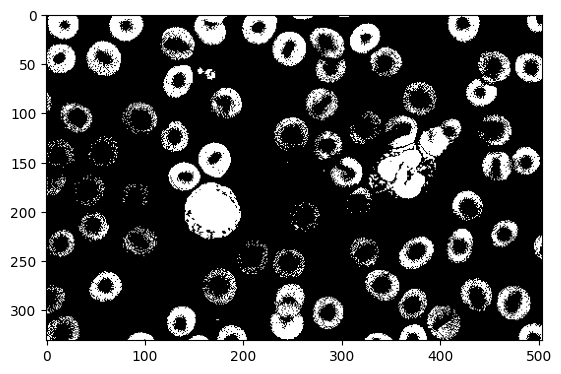

In [49]:
cells_dilation=cv2.dilate(cells_erosion,kernel,iterations=3)
plt_imgshow(cells_dilation)

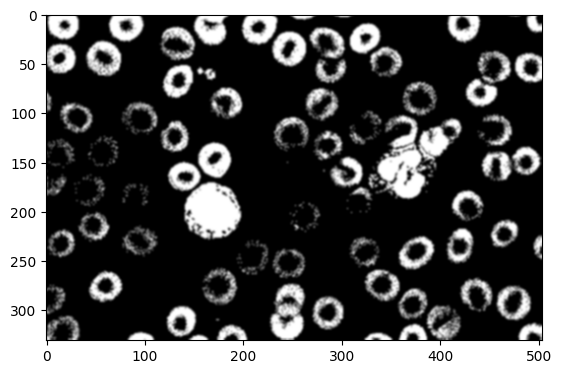

In [53]:
cells_gaussianblur = cv2.GaussianBlur(cells_dilation,(5,5),0)
plt_imgshow(cells_gaussianblur)

In [68]:
contours,hirearchy=cv2.findContours(cells_gaussianblur, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
area_threadhold = 30
contours_good = []
all_contours_area = []
for i in range(len(contours)):
    area = cv2.contourArea(contours[i])
    all_contours_area.append(area)
    if area > area_threadhold:
        contours_good.append(contours[i])
print("original contour number: ", len(contours),
      ", area > %d:" % area_threadhold,len(contours_good))
all_contours_area.sort()
print(all_contours_area)

original contour number:  138 , area > 30: 106
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 5.5, 6.0, 6.0, 6.0, 7.5, 7.5, 8.0, 8.5, 9.5, 15.0, 16.0, 16.0, 16.0, 18.0, 18.5, 20.0, 20.5, 21.5, 24.0, 32.0, 32.0, 33.0, 36.5, 43.5, 46.0, 47.0, 50.0, 53.0, 53.5, 55.5, 56.0, 56.0, 58.0, 59.0, 61.0, 66.5, 68.5, 69.0, 71.0, 78.5, 79.5, 82.0, 82.0, 90.0, 99.0, 101.0, 105.0, 109.0, 112.5, 115.0, 120.5, 121.0, 125.5, 128.5, 131.5, 137.5, 140.0, 140.5, 151.0, 153.0, 156.0, 159.5, 167.0, 170.5, 173.5, 189.0, 194.5, 199.0, 202.0, 202.5, 212.0, 220.0, 221.5, 230.5, 261.5, 271.5, 297.5, 362.5, 374.0, 383.0, 411.0, 429.5, 537.5, 555.0, 616.0, 621.0, 628.0, 732.5, 739.0, 747.5, 809.5, 833.5, 840.5, 840.5, 895.0, 904.5, 925.0, 928.5, 935.5, 940.5, 944.0, 962.5, 963.5, 968.5, 1002.5, 1016.5, 1019.0, 1028.5, 1080.5, 1085.0, 1094.0, 1171.0, 1188.5, 1198.0, 1687.5, 1707.5, 1800.0, 1833.5, 1857.5, 1890.0, 2150.5, 2399.0, 4014.0, 4960.5, 8153.0]


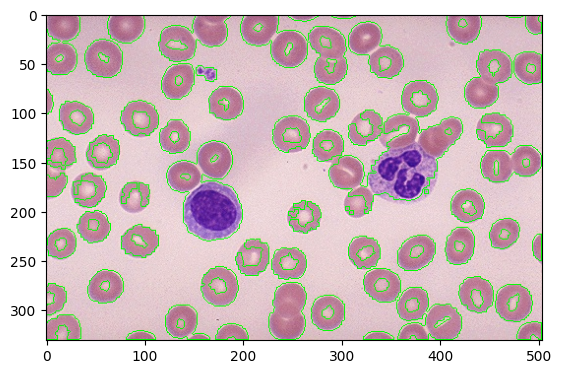

In [72]:
cells_copy = cells_img.copy()
cv2.drawContours(cells_copy,contours_good,-1,(0,255,0),1) 
plt_imgshow(cells_copy)

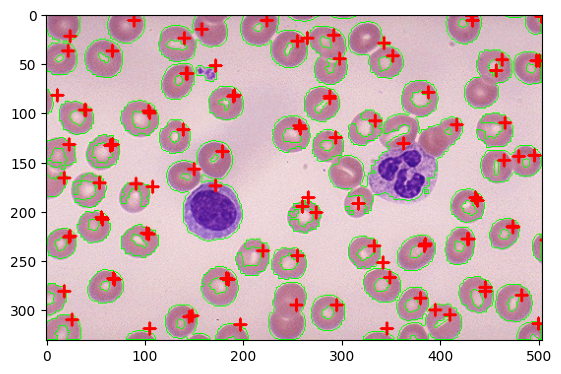

In [73]:
for i,j in zip(contours_good, range(len(contours_good))):
    M = cv2.moments(i)    
    cx=int(M["m10"]/M["m00"])
    cy=int(M["m01"]/M["m00"])
    cv2.putText(cells_copy, '+', (cx, cy), cv2.FONT_HERSHEY_PLAIN,1.5,(0, 0, 255), 2)
plt_imgshow(cells_copy)